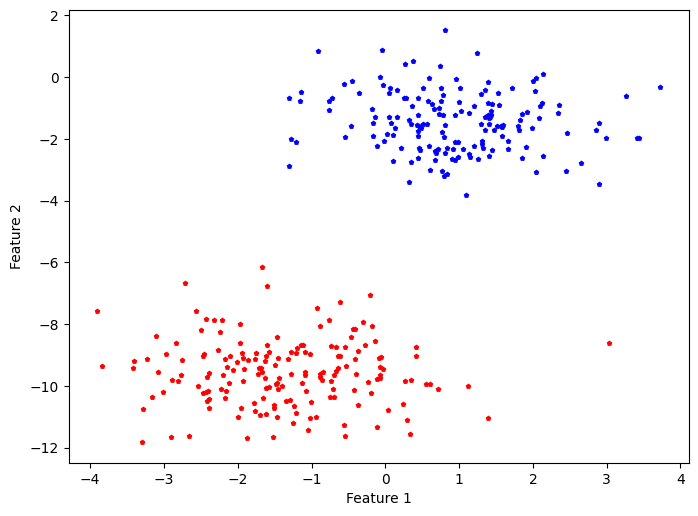

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

X, y = datasets.make_blobs(n_samples=500,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.33, random_state=42)

row, col = X_train.shape

#Plot Training Data
fig = plt.figure(figsize=(8,6), dpi = 100)
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'rp', markersize = 3)
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bp', markersize = 3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [2]:
}print (np.shape(X_train))
print (np.shape(y_train))
print (np.shape(X_test))
print (np.shape(y_test))

(335, 2)
(335,)
(165, 2)
(165,)


In [3]:
import random
anim_decsn = []

def step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    theta_batch = np.zeros((m, n+1, 1))
    
    for i in range(n+1):
      theta[i][0] = random.random()
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                #theta += lr*((y[idx] - y_hat)*x_i)
                theta_batch[idx] += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
              
        sum = 0
        for i in range(m):
          sum += theta_batch[i]
        theta = sum/m
        
        #print('theta', theta)
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        anim_decsn.append(theta)
    #print ('decsn', anim_decsn)
        
    return theta, n_miss_list


In [10]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X_train[:,0]), max(X_train[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(8,6), dpi = 100)
    plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "rp", markersize=3)
    plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bp", markersize=3)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')


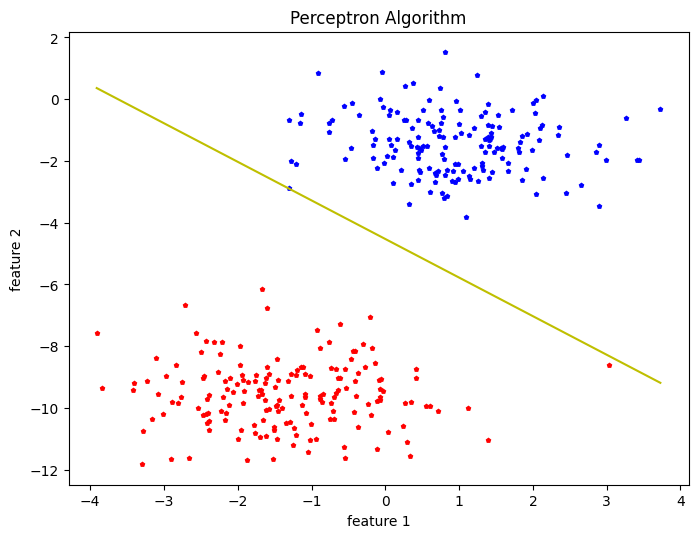

In [11]:
theta, miss_l = perceptron(X_train, y_train, 0.5, 110)
plot_decision_boundary(X_train, theta)

Text(0, 0.5, 'Error(#misclassified points)')

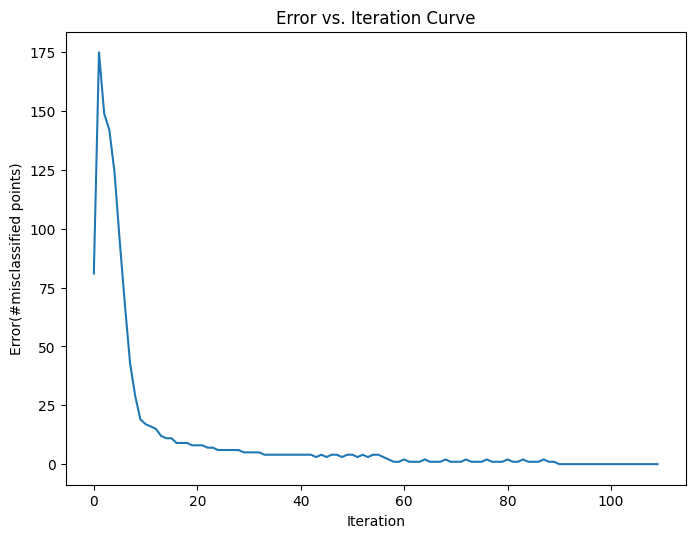

In [9]:
fig = plt.figure(figsize=(8,6), dpi = 100)
plt.plot(miss_l)
plt.title('Error vs. Iteration Curve')
plt.xlabel('Iteration')
plt.ylabel('Error(#misclassified points)')

In [13]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
from IPython import display
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
 
# marking the x-axis and y-axis
axis = plt.axes(xlim =(min(X[:,0]) - 2, max(X[:,0]) + 2), 
                ylim =(min(X[:,1]) - 2, max(X[:,1]) + 2))
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,

def animate(i):  
    plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'rp', markersize = 1)
    plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bp', markersize = 1)
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -anim_decsn[i][1]/anim_decsn[i][2]
    c = -anim_decsn[i][0]/anim_decsn[i][2]
    x2 = m*x1 + c
    
    line.set_data(x1, x2)
    return line,

anim = FuncAnimation(fig, animate, frames = 110, repeat = True, blit = True)  # frames = epochs

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

# anim.save('Convergence of Decision Surface.mp4', writer = 'ffmpeg', fps = 3, dpi = 200)

In [14]:
def predict(weights, test):
  activation = weights[0] + weights[1]*test[0] + weights[2]*test[1]
  return 1.0 if activation > 0.0 else 0.0

y_pred = []
for i in range(len(X_test)):
  y_pred.append(predict(theta, X_test[i]))

In [15]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[78  0]
 [ 1 86]]


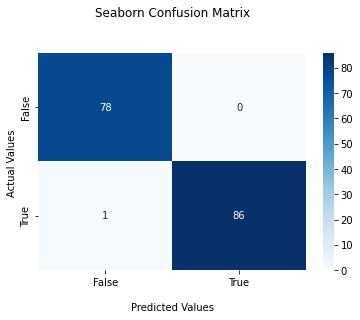

In [16]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()